In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow keras matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Cell 1: Import required libraries
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
#Cell 2: Data Augmentation and loading (modify file paths accordingly)
train_datagen = ImageDataGenerator(
    rescale=1./255,           
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,      
    rotation_range=40,        
    width_shift_range=0.2,    
    height_shift_range=0.2    
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    'test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 4004 images belonging to 2 classes.
Found 973 images belonging to 2 classes.


In [17]:
cnn = models.Sequential()

cnn.add(layers.Input(shape=(64, 64, 3)))
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))

cnn.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))

cnn.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=128, activation='relu'))
cnn.add(layers.Dropout(0.5))

cnn.add(layers.Dense(units=64, activation='relu'))
cnn.add(layers.Dropout(0.5))

cnn.add(layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
#training

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=110,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/110
125/126 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 0.5332 - loss: 0.6902
Epoch 1: val_accuracy improved from -inf to 0.60021, saving model to best_model.keras
126/126 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.5336 - loss: 0.6901 - val_accuracy: 0.6002 - val_loss: 0.6676
Epoch 2/110
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5886 - loss: 0.6634
Epoch 2: val_accuracy improved from 0.60021 to 0.61459, saving model to best_model.keras
126/126 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.5886 - loss: 0.6634 - val_accuracy: 0.6146 - val_loss: 0.6588
Epoch 3/110
125/126 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6258 - loss: 0.6589
Epoch 3: val_accuracy improved from 0.61459 to 0.64543, saving model to best_model.keras
126/126 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.6257 - loss: 0.6589 - val_accuracy: 0.6454 - val_loss: 0.6567
Epoch 4/110
125/126 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6436 - loss: 0.6447
Epoch 4: val_accuracy did not impro

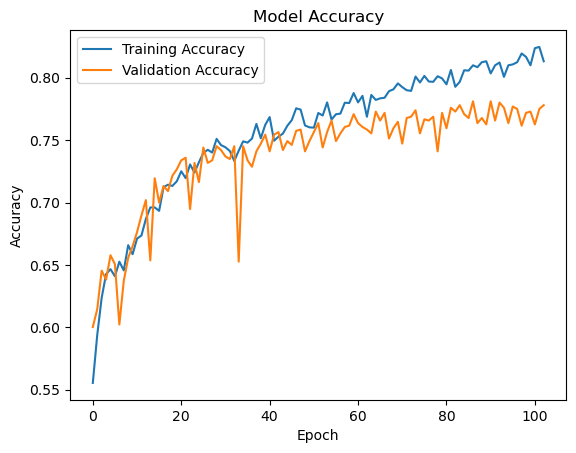

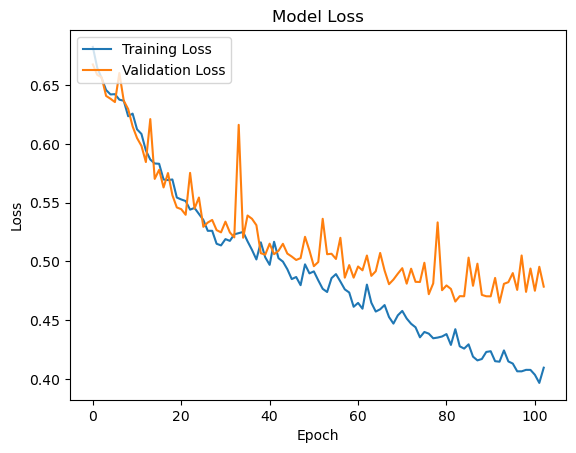

In [20]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

